In [1]:
from keras.datasets import mnist
from keras.utils import plot_model,print_summary,np_utils
import numpy as np

Using TensorFlow backend.


In [2]:
np.random.seed(4396)
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train4D = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test4D = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

x_train4D /=255.
x_test4D /=255.

y_train,y_test = np_utils.to_categorical(y_train),np_utils.to_categorical(y_test)

In [3]:
batch_size = 64
num_classes = 10
epoch = 100

In [4]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D 

In [5]:
model0 = Sequential([
    Conv2D(filters=8,
           kernel_size=(3,3),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           input_shape = (28,28,1)),
    Conv2D(filters=12,
           kernel_size=(3,3),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           ),
    Conv2D(filters=16,
           kernel_size=(3,3),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           ),
    Flatten(),
    Dense(10,
          activation='softmax',   
          kernel_initializer='lecun_normal',
          bias_initializer='zeros',
         ),
])
print_summary(model0)
plot_model(model0,to_file='model0.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 12)        876       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        1744      
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                125450    
Total params: 128,150
Trainable params: 128,150
Non-trainable params: 0
_________________________________________________________________


In [6]:
model1 = Sequential([
    Conv2D(filters=12,
           kernel_size=(5,5),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           input_shape = (28,28,1)),
    Conv2D(filters=16,
           kernel_size=(5,5),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           ),
    Flatten(),
    Dense(10,
          activation='softmax',   
          kernel_initializer='lecun_normal',
          bias_initializer='zeros',
         ),
])
print_summary(model1)
plot_model(model1,to_file='model1.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 12)        312       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        4816      
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                125450    
Total params: 130,578
Trainable params: 130,578
Non-trainable params: 0
_________________________________________________________________


In [7]:
model2 = Sequential([

    Conv2D(filters=17,
           kernel_size=(3,3),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           input_shape = (28,28,1)
           ),
    Flatten(),
    Dense(10,
          activation='softmax',   
          kernel_initializer='lecun_normal',
          bias_initializer='zeros',
         ),
])
print_summary(model2)
plot_model(model2,to_file='model2.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 17)        170       
_________________________________________________________________
flatten_3 (Flatten)          (None, 13328)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                133290    
Total params: 133,460
Trainable params: 133,460
Non-trainable params: 0
_________________________________________________________________


In [9]:
i = 0
for model in [model0,model1,model2]:
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    history =  model.fit(x=x_train4D,  
                         y=y_train,   
                         validation_data = (x_test4D,y_test),
                         epochs=epoch,
                         batch_size=batch_size, 
                         shuffle = True,
                         verbose=1)
    
    model.save('CNN_mnist_model{}.h5'.format(i))
    np.save('train_acc_history_CNN_mnist_model{}.npy'.format(i), history.history['acc'])
    np.save('train_loss_history_CNN_mnist_model{}.npy'.format(i), history.history['loss'])
    i+=1

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1135 - acc: 0.9661 - val_loss: 0.0818 - val_acc: 0.9726
Epoch 2/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.0841 - acc: 0.9739 - val_loss: 0.0976 - val_acc: 0.9704
Epoch 3/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.0721 - acc: 0.9779 - val_loss: 0.1098 - val_acc: 0.9681
Epoch 4/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.0670 - acc: 0.9795 - val_loss: 0.1047 - val_acc: 0.9713
Epoch 5/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.0588 - acc: 0.9817 - val_loss: 0.0931 - val_acc: 0.9750
Epoch 6/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.0535 - acc: 0.9836 - val_loss: 0.1235 - val_acc: 0.9684
Epoch 7/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.0493 - acc: 0.9851 - val_loss: 0.1096 - 

60000/60000 [==============================] - 3s 57us/step - loss: 0.0203 - acc: 0.9969 - val_loss: 0.2910 - val_acc: 0.9750
Epoch 60/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0199 - acc: 0.9967 - val_loss: 0.3255 - val_acc: 0.9721
Epoch 61/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0197 - acc: 0.9970 - val_loss: 0.2963 - val_acc: 0.9737
Epoch 62/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0212 - acc: 0.9969 - val_loss: 0.3047 - val_acc: 0.9745
Epoch 63/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0180 - acc: 0.9971 - val_loss: 0.2962 - val_acc: 0.9743
Epoch 64/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0181 - acc: 0.9972 - val_loss: 0.2954 - val_acc: 0.9740
Epoch 65/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0205 - acc: 0.9969 - val_loss: 0.3201 - val_acc: 0.9741
Epoch 66/100
60000/60000 [==============

Epoch 18/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0352 - acc: 0.9919 - val_loss: 0.1916 - val_acc: 0.9761
Epoch 19/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0335 - acc: 0.9924 - val_loss: 0.1682 - val_acc: 0.9770
Epoch 20/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0396 - acc: 0.9921 - val_loss: 0.1619 - val_acc: 0.9788
Epoch 21/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0379 - acc: 0.9917 - val_loss: 0.1503 - val_acc: 0.9815
Epoch 22/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0352 - acc: 0.9931 - val_loss: 0.1950 - val_acc: 0.9749
Epoch 23/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0311 - acc: 0.9935 - val_loss: 0.1660 - val_acc: 0.9786
Epoch 24/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0372 - acc: 0.9929 - val_loss: 0.1997 - val_acc: 0.9781
Epoch 25/100
60000/60000 [=

Epoch 77/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0236 - acc: 0.9975 - val_loss: 0.2412 - val_acc: 0.9810
Epoch 78/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0287 - acc: 0.9971 - val_loss: 0.2537 - val_acc: 0.9804
Epoch 79/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0296 - acc: 0.9969 - val_loss: 0.2293 - val_acc: 0.9824
Epoch 80/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0325 - acc: 0.9968 - val_loss: 0.2694 - val_acc: 0.9802
Epoch 81/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0227 - acc: 0.9977 - val_loss: 0.2645 - val_acc: 0.9804
Epoch 82/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0272 - acc: 0.9970 - val_loss: 0.2766 - val_acc: 0.9797
Epoch 83/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0247 - acc: 0.9973 - val_loss: 0.2514 - val_acc: 0.9809
Epoch 84/100
60000/60000 [=

60000/60000 [==============================] - 2s 39us/step - loss: 0.0208 - acc: 0.9931 - val_loss: 0.1427 - val_acc: 0.9704
Epoch 36/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0220 - acc: 0.9926 - val_loss: 0.1445 - val_acc: 0.9706
Epoch 37/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0190 - acc: 0.9936 - val_loss: 0.1509 - val_acc: 0.9703
Epoch 38/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0190 - acc: 0.9936 - val_loss: 0.1617 - val_acc: 0.9686
Epoch 39/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0169 - acc: 0.9946 - val_loss: 0.1524 - val_acc: 0.9707
Epoch 40/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0179 - acc: 0.9940 - val_loss: 0.1615 - val_acc: 0.9689
Epoch 41/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0165 - acc: 0.9944 - val_loss: 0.1636 - val_acc: 0.9685
Epoch 42/100
60000/60000 [==============

60000/60000 [==============================] - 2s 39us/step - loss: 0.0053 - acc: 0.9987 - val_loss: 0.2168 - val_acc: 0.9710
Epoch 95/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072 - acc: 0.9981 - val_loss: 0.2164 - val_acc: 0.9718
Epoch 96/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0072 - acc: 0.9979 - val_loss: 0.2242 - val_acc: 0.9700
Epoch 97/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0066 - acc: 0.9980 - val_loss: 0.2228 - val_acc: 0.9695
Epoch 98/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0072 - acc: 0.9979 - val_loss: 0.2380 - val_acc: 0.9684
Epoch 99/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0060 - acc: 0.9984 - val_loss: 0.2333 - val_acc: 0.9691
Epoch 100/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0060 - acc: 0.9984 - val_loss: 0.2127 - val_acc: 0.9710


In [10]:
train_acc_history_CNN_mnist_model0 = np.load('train_acc_history_CNN_mnist_model0.npy')
train_loss_history_CNN_mnist_model0 = np.load('train_loss_history_CNN_mnist_model0.npy')

train_acc_history_CNN_mnist_model1 = np.load('train_acc_history_CNN_mnist_model1.npy')
train_loss_history_CNN_mnist_model1 = np.load('train_loss_history_CNN_mnist_model1.npy')

train_acc_history_CNN_mnist_model2 = np.load('train_acc_history_CNN_mnist_model2.npy')
train_loss_history_CNN_mnist_model2 = np.load('train_loss_history_CNN_mnist_model2.npy')


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

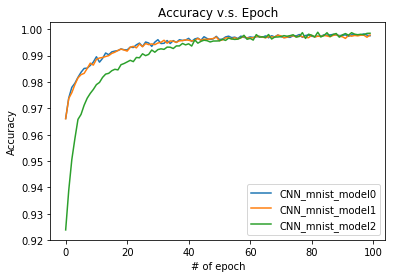

In [12]:
plt.plot(train_acc_history_CNN_mnist_model0)
plt.plot(train_acc_history_CNN_mnist_model1)
plt.plot(train_acc_history_CNN_mnist_model2)
plt.title('Accuracy v.s. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('# of epoch')
plt.legend(['CNN_mnist_model0', 'CNN_mnist_model1', 'CNN_mnist_model2'],
     loc='best')
plt.savefig('CNN_MNIST_ACC.png')

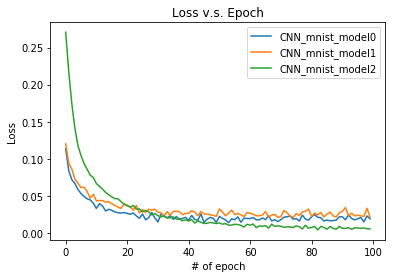

In [13]:
plt.plot(train_loss_history_CNN_mnist_model0)
plt.plot(train_loss_history_CNN_mnist_model1)
plt.plot(train_loss_history_CNN_mnist_model2)
plt.title('Loss v.s. Epoch')
plt.ylabel('Loss')
plt.xlabel('# of epoch')
plt.legend(['CNN_mnist_model0', 'CNN_mnist_model1', 'CNN_mnist_model2'],
     loc='best')
plt.savefig('CNN_MNIST_LOSS.png')


In [20]:
def print_best_acc(model):
    best_acc = np.amax(model)
    best_acc_at_epoch = np.argmax(model)
    print('best acc = {}, at epoch {}'.format(best_acc,best_acc_at_epoch))

In [21]:
print_best_acc(train_acc_history_CNN_mnist_model0)

best acc = 0.9982, at epoch 97


In [22]:
print_best_acc(train_acc_history_CNN_mnist_model1)

best acc = 0.9978833333333333, at epoch 88


In [23]:
print_best_acc(train_acc_history_CNN_mnist_model2)

best acc = 0.9988166666666667, at epoch 82


结论 model0最深,能够更快的收敛,由于训练集过小,后期差别并不明显